# Downloading libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../DataSets/final_dataset.csv")

# Team Level Features

In [4]:
teams = pd.unique(df[['home_team', 'away_team']].values.ravel())
team_stats = pd.DataFrame(index=teams)

### Creating Statistics for each team: Total matches, Total wins, Total draws, Total Losses

In [6]:
team_stats['total_matches'] = 0
team_stats['total_wins'] = 0
team_stats['total_draws'] = 0
team_stats['total_losses'] = 0

for team in teams: 
    #All matches played
    team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)]
    team_stats.at[team, 'total_matches'] = team_matches.shape[0]
    
    #Wins
    home_wins = team_matches[(team_matches['home_team']==team) & (team_matches['winner'] == 1)].shape[0]
    away_wins = team_matches[(team_matches['away_team']==team) & (team_matches['winner'] == 2)].shape[0]
    team_stats.at[team, 'total_wins'] = home_wins + away_wins

    # Draws
    draws = team_matches[team_matches['winner'] == 0].shape[0]
    team_stats.at[team, 'total_draws'] = draws

    # Losses
    team_stats.at[team, 'total_losses'] = team_stats.at[team, 'total_matches'] - team_stats.at[team, 'total_wins'] - draws

team_stats['win_rate'] = team_stats['total_wins'] / team_stats['total_matches']
team_stats['draw_rate'] = team_stats['total_draws'] / team_stats['total_matches']
team_stats['loss_rate'] = team_stats['total_losses'] / team_stats['total_matches']


In [7]:
team_stats.head()

,total_matches,total_wins,total_draws,total_losses,win_rate,draw_rate,loss_rate
qatar,11,6,2,3,0.545455,0.181818,0.272727
ecuador,7,2,3,2,0.285714,0.428571,0.285714
england,12,6,4,2,0.500000,0.333333,0.166667
iran,9,5,1,3,0.555556,0.111111,0.333333
senegal,8,5,1,2,0.625000,0.125000,0.250000


### Team Goal Statistics

In [9]:
team_stats['goals_scored'] = 0
team_stats['goals_conceded'] = 0

for team in teams:
    #Goals scored
    home_goals = df.loc[df['home_team']==team, 'home_score'].sum()
    away_goals = df.loc[df['away_team']==team, 'away_score'].sum()
    team_stats.at[team, 'goals_scored'] = home_goals + away_goals

    # Goals conceded
    goals_against_home = df.loc[df['home_team']==team, 'away_score'].sum()
    goals_against_away = df.loc[df['away_team']==team, 'home_score'].sum()
    team_stats.at[team, 'goals_conceded'] = goals_against_home + goals_against_away

# Average goals per match
team_stats['avg_goals_scored'] = team_stats['goals_scored'] / team_stats['total_matches']
team_stats['avg_goals_conceded'] = team_stats['goals_conceded'] / team_stats['total_matches']
team_stats['goal_diff_per_match'] = team_stats['avg_goals_scored'] - team_stats['avg_goals_conceded']

In [10]:
team_stats.head()

,total_matches,total_wins,total_draws,total_losses,win_rate,draw_rate,loss_rate,goals_scored,goals_conceded,avg_goals_scored,avg_goals_conceded,goal_diff_per_match
qatar,11,6,2,3,0.545455,0.181818,0.272727,18,13,1.636364,1.181818,0.454545
ecuador,7,2,3,2,0.285714,0.428571,0.285714,9,7,1.285714,1.000000,0.285714
england,12,6,4,2,0.500000,0.333333,0.166667,21,10,1.750000,0.833333,0.916667
iran,9,5,1,3,0.555556,0.111111,0.333333,16,13,1.777778,1.444444,0.333333
senegal,8,5,1,2,0.625000,0.125000,0.250000,14,9,1.750000,1.125000,0.625000


### xG Expected Goals for each team

In [12]:
team_stats['xg_for'] = 0.0
team_stats['xg_against'] = 0.0

for team in teams:
    #finding total xG for each team
    xg_for_home = df.loc[df['home_team']==team, 'home_xg'].sum()
    xg_for_away = df.loc[df['away_team']==team, 'away_xg'].sum()
    team_stats.at[team, 'xg_for'] = xg_for_home + xg_for_away

    #finding total xG for a team against
    xg_against_home = df.loc[df['home_team']==team, 'away_xg'].sum()
    xg_against_away = df.loc[df['away_team']==team, 'home_xg'].sum()
    team_stats.at[team, 'xg_against'] = xg_against_home + xg_against_away

#finding the average of that
team_stats['avg_xg_for'] = team_stats['xg_for'] / team_stats['total_matches']
team_stats['avg_xg_against'] = team_stats['xg_against'] / team_stats['total_matches']
team_stats['xg_diff_per_match'] = team_stats['avg_xg_for'] - team_stats['avg_xg_against']
team_stats['xg_overperf'] = (team_stats['goals_scored'] - team_stats['xg_for']) / team_stats['total_matches']

In [13]:
team_stats.head()

,total_matches,total_wins,total_draws,total_losses,win_rate,draw_rate,loss_rate,goals_scored,goals_conceded,avg_goals_scored,avg_goals_conceded,goal_diff_per_match,xg_for,xg_against,avg_xg_for,avg_xg_against,xg_diff_per_match,xg_overperf
qatar,11,6,2,3,0.545455,0.181818,0.272727,18,13,1.636364,1.181818,0.454545,17.95,13.57,1.631818,1.233636,0.398182,0.004545
ecuador,7,2,3,2,0.285714,0.428571,0.285714,9,7,1.285714,1.000000,0.285714,9.24,6.88,1.320000,0.982857,0.337143,-0.034286
england,12,6,4,2,0.500000,0.333333,0.166667,21,10,1.750000,0.833333,0.916667,14.86,11.08,1.238333,0.923333,0.315000,0.511667
iran,9,5,1,3,0.555556,0.111111,0.333333,16,13,1.777778,1.444444,0.333333,16.60,11.70,1.844444,1.300000,0.544444,-0.066667
senegal,8,5,1,2,0.625000,0.125000,0.250000,14,9,1.750000,1.125000,0.625000,13.10,7.90,1.637500,0.987500,0.650000,0.112500


### Discipline Statistics

In [15]:
team_stats['yellow_cards'] = 0
team_stats['avg_yellow_cards'] = 0.0

#finding total yellow cards for each team
for team in teams:
    yc_home = df.loc[df['home_team'] == team, 'home_yc'].sum()
    yc_away = df.loc[df['away_team'] == team, 'away_yc'].sum()
    team_stats.at[team, 'yellow_cards'] = yc_home + yc_away
    team_stats.at[team, 'avg_yellow_cards'] = team_stats.at[team, 'yellow_cards'] / team_stats.at[team, 'total_matches']

In [16]:
team_stats.head()

,total_matches,total_wins,total_draws,total_losses,win_rate,draw_rate,loss_rate,goals_scored,goals_conceded,avg_goals_scored,avg_goals_conceded,goal_diff_per_match,xg_for,xg_against,avg_xg_for,avg_xg_against,xg_diff_per_match,xg_overperf,yellow_cards,avg_yellow_cards
qatar,11,6,2,3,0.545455,0.181818,0.272727,18,13,1.636364,1.181818,0.454545,17.95,13.57,1.631818,1.233636,0.398182,0.004545,24,2.181818
ecuador,7,2,3,2,0.285714,0.428571,0.285714,9,7,1.285714,1.000000,0.285714,9.24,6.88,1.320000,0.982857,0.337143,-0.034286,9,1.285714
england,12,6,4,2,0.500000,0.333333,0.166667,21,10,1.750000,0.833333,0.916667,14.86,11.08,1.238333,0.923333,0.315000,0.511667,16,1.333333
iran,9,5,1,3,0.555556,0.111111,0.333333,16,13,1.777778,1.444444,0.333333,16.60,11.70,1.844444,1.300000,0.544444,-0.066667,19,2.111111
senegal,8,5,1,2,0.625000,0.125000,0.250000,14,9,1.750000,1.125000,0.625000,13.10,7.90,1.637500,0.987500,0.650000,0.112500,14,1.750000


### Defensive metrics

In [18]:
team_stats['clean_sheets'] = 0
team_stats['clean_sheet_rate'] = 0.0

#How many games did the team not conceded a goal
for team in teams:
    home_cs = df.loc[(df['home_team']==team) & (df['away_score']==0)].shape[0]
    away_cs = df.loc[(df['away_team']==team) & (df['home_score']==0)].shape[0]
    team_stats.at[team, 'clean_sheets'] = home_cs + away_cs
    team_stats.at[team, 'clean_sheet_rate'] = team_stats.at[team, 'clean_sheets'] / team_stats.at[team, 'total_matches']

In [19]:
team_stats.head()

,total_matches,total_wins,total_draws,total_losses,win_rate,draw_rate,loss_rate,goals_scored,goals_conceded,avg_goals_scored,...,xg_for,xg_against,avg_xg_for,avg_xg_against,xg_diff_per_match,xg_overperf,yellow_cards,avg_yellow_cards,clean_sheets,clean_sheet_rate
qatar,11,6,2,3,0.545455,0.181818,0.272727,18,13,1.636364,...,17.95,13.57,1.631818,1.233636,0.398182,0.004545,24,2.181818,3,0.272727
ecuador,7,2,3,2,0.285714,0.428571,0.285714,9,7,1.285714,...,9.24,6.88,1.320000,0.982857,0.337143,-0.034286,9,1.285714,2,0.285714
england,12,6,4,2,0.500000,0.333333,0.166667,21,10,1.750000,...,14.86,11.08,1.238333,0.923333,0.315000,0.511667,16,1.333333,5,0.416667
iran,9,5,1,3,0.555556,0.111111,0.333333,16,13,1.777778,...,16.60,11.70,1.844444,1.300000,0.544444,-0.066667,19,2.111111,3,0.333333
senegal,8,5,1,2,0.625000,0.125000,0.250000,14,9,1.750000,...,13.10,7.90,1.637500,0.987500,0.650000,0.112500,14,1.750000,2,0.250000


# Merging with main dataset

In [21]:
home_features = team_stats.add_prefix('home_team_')
away_features = team_stats.add_prefix('away_team_')

In [22]:
# Merge Home team stats
df = df.merge(home_features, left_on='home_team', right_index=True, how='left')

# Merge Away team stats
df = df.merge(away_features, left_on='away_team', right_index=True, how='left')

In [23]:
df.shape

(235, 59)

In [24]:
df.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_score                       0
away_score                       0
home_xg                          0
away_xg                          0
home_yc                          0
away_yc                          0
home_team_elo                    0
away_team_elo                    0
elo_diff                         0
winner                           0
home_qualified                   0
away_qualified                   0
home_team_total_matches          0
home_team_total_wins             0
home_team_total_draws            0
home_team_total_losses           0
home_team_win_rate               0
home_team_draw_rate              0
home_team_loss_rate              0
home_team_goals_scored           0
home_team_goals_conceded         0
home_team_avg_goals_scored       0
home_team_avg_goals_conceded     0
home_team_goal_diff_per_match    0
home_team_xg_for                 0
home_team_xg_against

## Matchup difference Features

In [26]:
# Goal scoring difference
df['goal_diff'] = df['home_team_avg_goals_scored'] - df['away_team_avg_goals_scored']

# Defensive difference (goals conceded)
df['def_diff'] = df['home_team_avg_goals_conceded'] - df['away_team_avg_goals_conceded']

# xG for difference
df['xg_for_diff'] = df['home_team_avg_xg_for'] - df['away_team_avg_xg_for']

# xG against difference
df['xg_against_diff'] = df['away_team_avg_xg_against'] - df['home_team_avg_xg_against']

# Win rate difference
df['win_rate_diff'] = df['home_team_win_rate'] - df['away_team_win_rate']

df['elo_diff'] = abs(df['elo_diff'])

In [27]:
df.head()

,date,home_team,away_team,home_score,away_score,home_xg,away_xg,home_yc,away_yc,home_team_elo,...,away_team_xg_overperf,away_team_yellow_cards,away_team_avg_yellow_cards,away_team_clean_sheets,away_team_clean_sheet_rate,goal_diff,def_diff,xg_for_diff,xg_against_diff,win_rate_diff
0,2022-11-20 19:00:00,qatar,ecuador,0,2,0.3,1.2,4,2,53,...,-0.034286,9,1.285714,2,0.285714,0.350649,0.181818,0.311818,-0.250779,0.259740
1,2022-11-21 16:00:00,england,iran,6,2,2.1,1.4,0,2,4,...,-0.066667,19,2.111111,3,0.333333,-0.027778,-0.611111,-0.606111,0.376667,-0.055556
2,2022-11-21 19:00:00,senegal,netherlands,0,2,0.9,0.7,2,1,18,...,0.643636,12,1.090909,4,0.363636,-0.068182,0.125000,0.462955,0.161591,0.079545
3,2022-11-21 22:00:00,united states,wales,1,1,0.8,1.5,4,2,16,...,-0.566667,4,1.333333,0,0.000000,1.128205,-1.000000,0.427692,0.521026,0.461538
4,2022-11-22 13:00:00,argentina,saudi arabia,1,2,2.2,0.1,0,6,2,...,-0.155455,30,2.727273,2,0.181818,0.818182,-0.272727,0.935455,0.692727,0.181818


# Encoding Categorical Variables

In [29]:
#df = df.drop(columns=['date'])

#Giving special unique number to the team as it is much faster to process
le1 = LabelEncoder()
df['home_team_encoded'] = le1.fit_transform(df['home_team'])

le2 = LabelEncoder()
df['away_team_encoded'] = le2.fit_transform(df['away_team'])

In [30]:
df.head()

,date,home_team,away_team,home_score,away_score,home_xg,away_xg,home_yc,away_yc,home_team_elo,...,away_team_avg_yellow_cards,away_team_clean_sheets,away_team_clean_sheet_rate,goal_diff,def_diff,xg_for_diff,xg_against_diff,win_rate_diff,home_team_encoded,away_team_encoded
0,2022-11-20 19:00:00,qatar,ecuador,0,2,0.3,1.2,4,2,53,...,1.285714,2,0.285714,0.350649,0.181818,0.311818,-0.250779,0.259740,56,23
1,2022-11-21 16:00:00,england,iran,6,2,2.1,1.4,0,2,4,...,2.111111,3,0.333333,-0.027778,-0.611111,-0.606111,0.376667,-0.055556,22,42
2,2022-11-21 19:00:00,senegal,netherlands,0,2,0.9,0.7,2,1,18,...,1.090909,4,0.363636,-0.068182,0.125000,0.462955,0.161591,0.079545,60,57
3,2022-11-21 22:00:00,united states,wales,1,1,0.8,1.5,4,2,16,...,1.333333,0,0.000000,1.128205,-1.000000,0.427692,0.521026,0.461538,75,89
4,2022-11-22 13:00:00,argentina,saudi arabia,1,2,2.2,0.1,0,6,2,...,2.727273,2,0.181818,0.818182,-0.272727,0.935455,0.692727,0.181818,2,68


In [31]:
df['winner'].value_counts(normalize=True)  # gives percentages

winner
1    0.438298
2    0.293617
0    0.268085
Name: proportion, dtype: float64

## Remove Leakage Columns for the future model

In [33]:
leak_cols = ['home_score', 'away_score', 'home_xg', 'away_xg', 'home_yc', 'away_yc']
df_model = df.drop(columns=leak_cols)

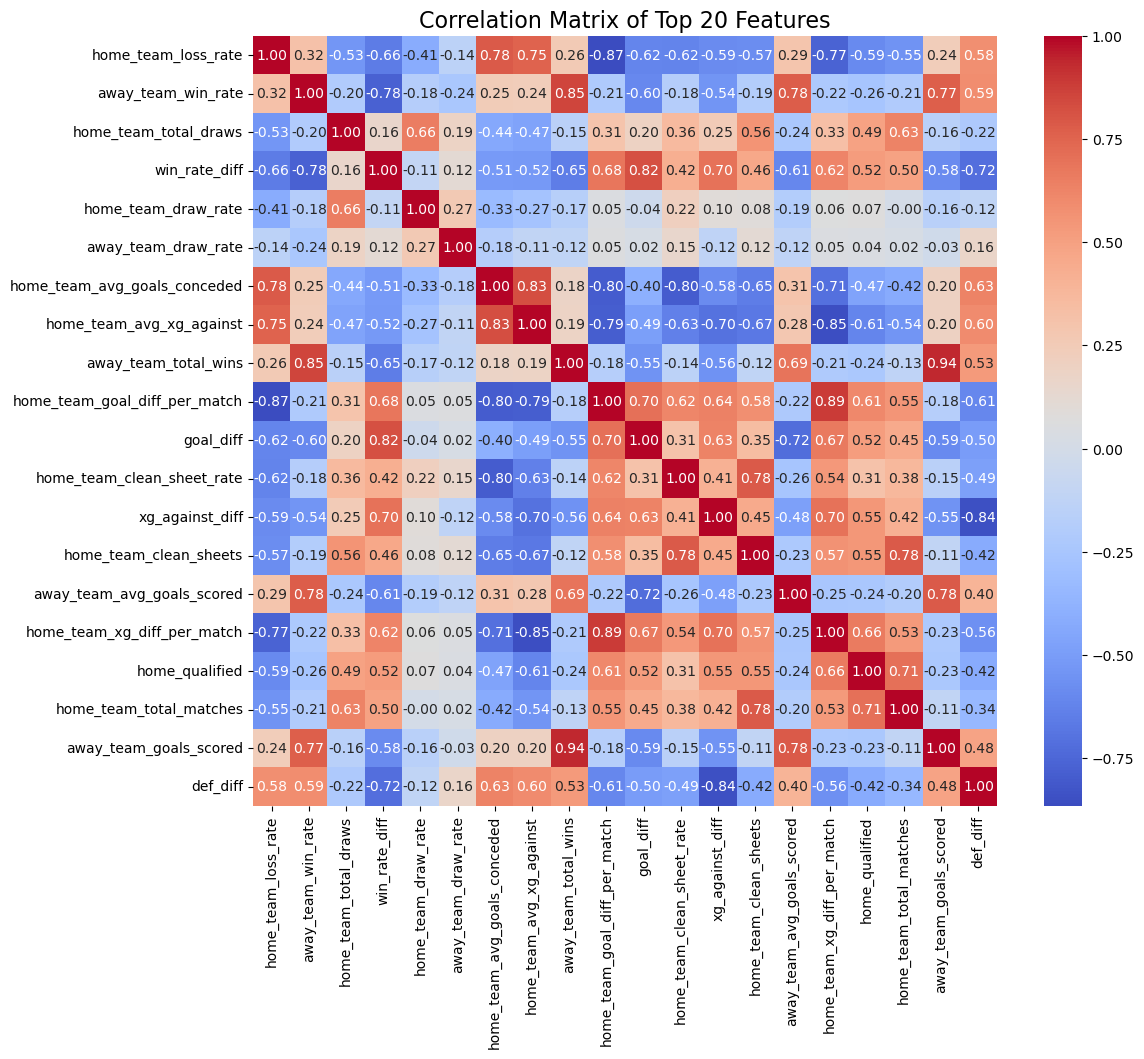

In [34]:
# Compute correlation with target (thing that we want to predict)
#Extract numeric only columns with their biggest correlation with 'winner'.
#Compare with them with each other
#Sorts them from strongest to weakest.

corr_with_target = df_model.corr(numeric_only = True)['winner'].abs().sort_values(ascending=False)

# Select top 20 features (excluding target itself)
top_features = corr_with_target.index[1:21]

# Plot heatmap for these features only
plt.figure(figsize=(12,10))
sns.heatmap(df_model[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Top 20 Features", fontsize=16)
plt.show()

In [35]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           235 non-null    object 
 1   home_team                      235 non-null    object 
 2   away_team                      235 non-null    object 
 3   home_team_elo                  235 non-null    int64  
 4   away_team_elo                  235 non-null    int64  
 5   elo_diff                       235 non-null    int64  
 6   winner                         235 non-null    int64  
 7   home_qualified                 235 non-null    int64  
 8   away_qualified                 235 non-null    int64  
 9   home_team_total_matches        235 non-null    int64  
 10  home_team_total_wins           235 non-null    int64  
 11  home_team_total_draws          235 non-null    int64  
 12  home_team_total_losses         235 non-null    int

In [36]:
# Features
x = df_model.drop(columns=['winner'])

# Target
y = df_model['winner']

# List all feature names
print("Features:", x.columns.tolist())
print("  ")
print("Number of features:", x.shape[1])

Features: ['date', 'home_team', 'away_team', 'home_team_elo', 'away_team_elo', 'elo_diff', 'home_qualified', 'away_qualified', 'home_team_total_matches', 'home_team_total_wins', 'home_team_total_draws', 'home_team_total_losses', 'home_team_win_rate', 'home_team_draw_rate', 'home_team_loss_rate', 'home_team_goals_scored', 'home_team_goals_conceded', 'home_team_avg_goals_scored', 'home_team_avg_goals_conceded', 'home_team_goal_diff_per_match', 'home_team_xg_for', 'home_team_xg_against', 'home_team_avg_xg_for', 'home_team_avg_xg_against', 'home_team_xg_diff_per_match', 'home_team_xg_overperf', 'home_team_yellow_cards', 'home_team_avg_yellow_cards', 'home_team_clean_sheets', 'home_team_clean_sheet_rate', 'away_team_total_matches', 'away_team_total_wins', 'away_team_total_draws', 'away_team_total_losses', 'away_team_win_rate', 'away_team_draw_rate', 'away_team_loss_rate', 'away_team_goals_scored', 'away_team_goals_conceded', 'away_team_avg_goals_scored', 'away_team_avg_goals_conceded', 'awa

In [37]:
x.shape

(235, 59)

In [38]:
x.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_elo                    0
away_team_elo                    0
elo_diff                         0
home_qualified                   0
away_qualified                   0
home_team_total_matches          0
home_team_total_wins             0
home_team_total_draws            0
home_team_total_losses           0
home_team_win_rate               0
home_team_draw_rate              0
home_team_loss_rate              0
home_team_goals_scored           0
home_team_goals_conceded         0
home_team_avg_goals_scored       0
home_team_avg_goals_conceded     0
home_team_goal_diff_per_match    0
home_team_xg_for                 0
home_team_xg_against             0
home_team_avg_xg_for             0
home_team_avg_xg_against         0
home_team_xg_diff_per_match      0
home_team_xg_overperf            0
home_team_yellow_cards           0
home_team_avg_yellow_cards       0
home_team_clean_shee

In [39]:
y.value_counts()

winner
1    103
2     69
0     63
Name: count, dtype: int64

In [40]:
# Ensure date is datetime type
df_model['date'] = pd.to_datetime(df_model['date'])

# Train: 2022-2024, Test: 2025
train_mask = df_model['date'].dt.year <= 2024
test_mask = df_model['date'].dt.year == 2025

x_train = x[train_mask]
y_train = y[train_mask]
x_test = x[test_mask]
y_test = y[test_mask]

# Print sizes
print("Train size:", x_train.shape)
print("Test size:", x_test.shape)

# Check target distribution
print("Train target distribution:\n", y_train.value_counts())
print("Test target distribution:\n", y_test.value_counts())


Train size: (212, 59)
Test size: (23, 59)
Train target distribution:
 winner
1    93
2    64
0    55
Name: count, dtype: int64
Test target distribution:
 winner
1    10
0     8
2     5
Name: count, dtype: int64


# Save the data

In [42]:
# Save feature-engineered dataset
df_model.to_csv('../DataSets/data_features.csv', index=False)

#Train models
x_train.to_csv('../DataSets/x_train.csv', index=False)
x_test.to_csv('../DataSets/x_test.csv', index=False)
y_train.to_csv('../DataSets/y_train.csv', index=False)
y_test.to_csv('../DataSets/y_test.csv', index=False)
team_stats.to_csv("../DataSets/team_stats.csv", index=True)